In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../')
import fewshot.proto.sampler
import fewshot.data

import torch.utils.data
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Exploring Prototypical Networks

We here check and iterate on implementation of prototypical networks. The main implementation is in `fewshot.proto` and is quite closely based on @oscarknagg's implementation [here](https://github.com/oscarknagg/few-shot/).

We're not reusing the implementation directly because I'm pretty sure there's at least one significant flaw with the implementation on that repo.



## Data Loading and Episodes

We follow the idea of putting all data in a single tensor. For an `n`-shot `k`-way episode with `q` queries, the tensor shape will be `((n+q)*k, n_channels, width, height)` - and the first dimension is split:
The first `n*k` items are the examples, and the last `q*k` examples are the queries.

We reimplemented this and added an episode viz function below:

In [9]:
train_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

In [10]:
ds = fewshot.proto.sampler.NShotFashionDataset('../data/fashion-dataset/styles_quoted.csv',
                                               '../data/fashion-dataset/images/',
                                               classlist=None,
                                               transform=test_transform)

In [11]:
n, k, q = 2, 10, 5
sampler = fewshot.proto.sampler.NShotTaskSampler(ds, episodes_per_epoch=10, n=n, k=k, q=q)
dl = torch.utils.data.DataLoader(ds, batch_sampler=sampler, num_workers=4)

In [13]:
episode = next(iter(dl))

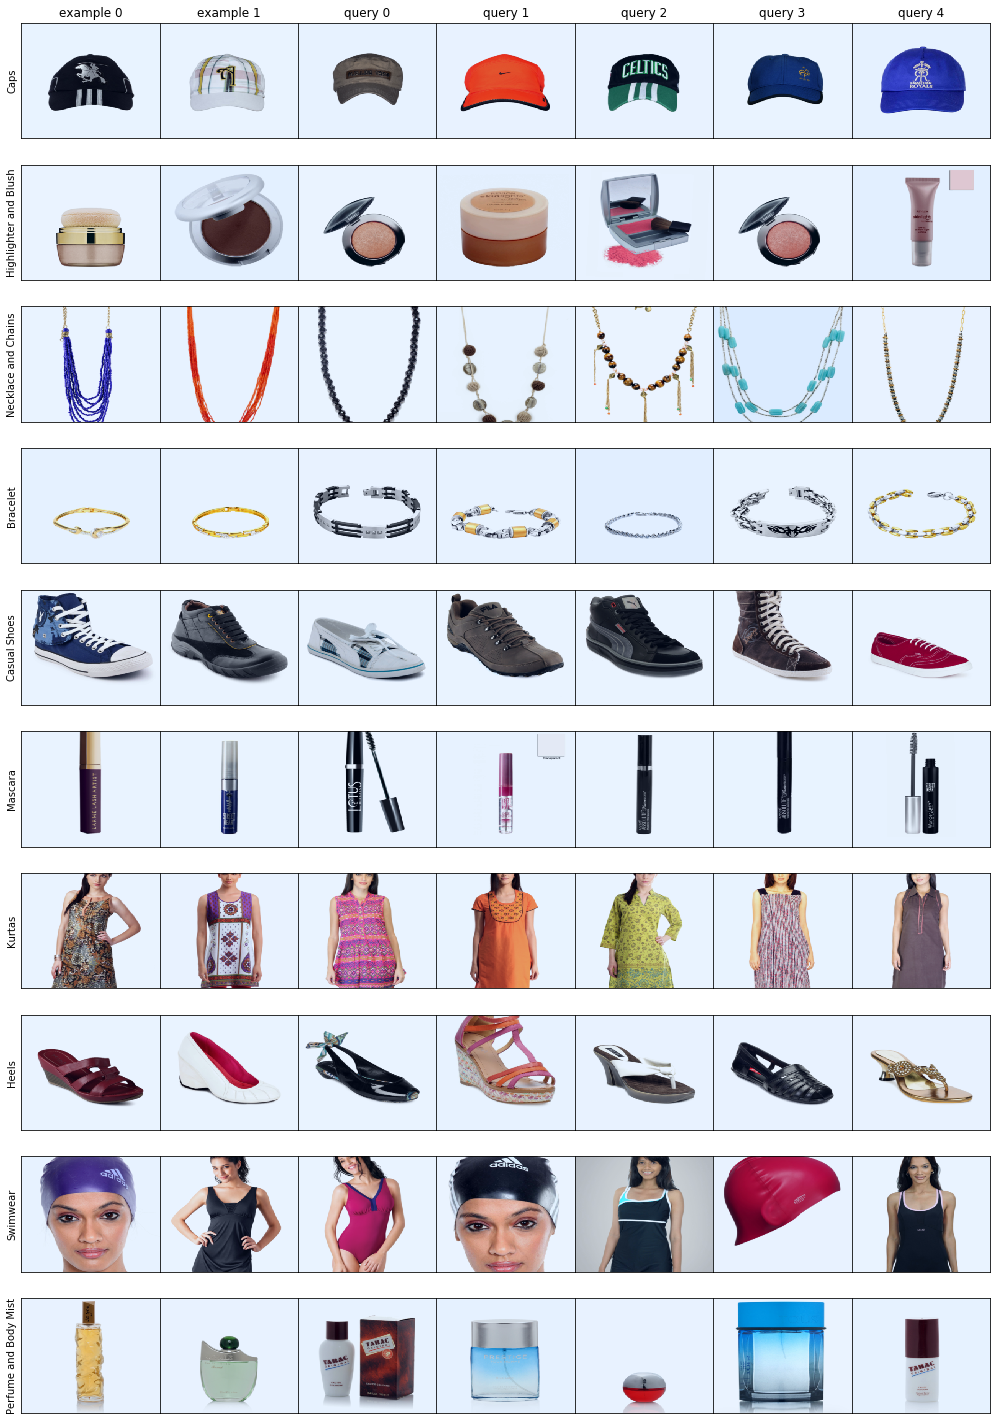

In [14]:
scale = 2
fewshot.proto.sampler.plot_nshot_episode(ha, n, k , q, scale)